In [3]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import warnings

# Gather

In [4]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [4]:
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [5]:
df_image = pd.read_csv('image_predictions.tsv', sep='\t')
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [4]:
consumer_key = 'Consumer Key'
consumer_secret = 'Consumer Secret'
access_token = 'Access Token'
access_secret = 'Access Secret'

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,parser = tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:

df_list = []

error_list = []



for tweet_id in df_twitter['tweet_id']:
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
        
        
        favorites = page['favorite_count'] # How many favorites the tweet had
        retweets = page['retweet_count'] # Count of the retweet
        user_followers = page['user']['followers_count'] # How many followers the user had
        user_favourites = page['user']['favourites_count'] # How many favorites the user had
        date_time = page['created_at'] # The date and time of the creation
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    
    
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 735
Rate limit reached. Sleeping for: 734


In [7]:
ee_list = []
for e in error_list:
    try:
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        user_followers = page['user']['followers_count']
        user_favourites = page['user']['favourites_count']
        date_time = page['created_at']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception:
        print(str(tweet_id)+ " _ " + str(e))
        ee_list.append(e)

In [8]:
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])


json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [6]:
json_tweets = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
json_tweets

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38690,8558,6992402,134549,2017-08-01 16:23:56
1,892177421306343426,33159,6291,6992402,134549,2017-08-01 00:17:27
2,891815181378084864,24962,4174,6992402,134549,2017-07-31 00:18:03
3,891689557279858688,42071,8690,6992402,134549,2017-07-30 15:58:51
4,891327558926688256,40227,9450,6992402,134549,2017-07-29 16:00:24
5,891087950875897856,20170,3128,6992402,134549,2017-07-29 00:08:17
6,890971913173991426,11814,2081,6992402,134549,2017-07-28 16:27:12
7,890729181411237888,65354,18979,6992402,134549,2017-07-28 00:22:40
8,890609185150312448,27724,4280,6992402,134549,2017-07-27 16:25:51
9,890240255349198849,31861,7446,6992402,134549,2017-07-26 15:59:51


# Access

In [12]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
df_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [18]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [11]:
json_tweets.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38690,8558,6992402,134549,2017-08-01 16:23:56
1,892177421306343426,33159,6291,6992402,134549,2017-08-01 00:17:27
2,891815181378084864,24962,4174,6992402,134549,2017-07-31 00:18:03
3,891689557279858688,42071,8690,6992402,134549,2017-07-30 15:58:51
4,891327558926688256,40227,9450,6992402,134549,2017-07-29 16:00:24


In [12]:
json_tweets.tail()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
2351,666020888022790149,2563,516,6992426,134549,2015-11-15 22:32:08
2352,666020888022790149,2563,516,6992426,134549,2015-11-15 22:32:08
2353,666020888022790149,2563,516,6992426,134549,2015-11-15 22:32:08
2354,666020888022790149,2563,516,6992426,134549,2015-11-15 22:32:08
2355,666020888022790149,2563,516,6992426,134549,2015-11-15 22:32:08


In [13]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id           2356 non-null int64
favorites          2356 non-null int64
retweets           2356 non-null int64
user_followers     2356 non-null int64
user_favourites    2356 non-null int64
date_time          2356 non-null object
dtypes: int64(5), object(1)
memory usage: 110.5+ KB


In [14]:
json_tweets.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.356000e+03,2356.000000,2356.000000,2.356000e+03,2356.000000
mean,7.419379e+17,8018.380730,3003.025891,6.992430e+06,134549.014007
std,6.837471e+16,12081.792098,5005.958273,1.140488e+02,0.117543
min,6.660209e+17,0.000000,0.000000,6.992402e+06,134549.000000
25%,6.779127e+17,1404.000000,596.750000,6.992410e+06,134549.000000
50%,7.183508e+17,3512.500000,1399.000000,6.992419e+06,134549.000000
75%,7.986836e+17,9911.250000,3500.500000,6.992425e+06,134549.000000
max,8.924206e+17,142980.000000,77127.000000,6.993395e+06,134550.000000


# Clean

### Quality

#### df_twitter 
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers and not float
- In several columns null objects are not null
- Name column have invalid names
- We want originals tweets having ratings not retweets

#### df_image
- Missing values from image dataset
- Some tweet_ids have the same jpg_url
- Some tweets are have 2 different tweet_id one redirect to the other

#### json_tweets
- duplicated records

### Tideness
- Unnecessary details
- Various stages of dogs in columns instead of rows archives dataset

In [7]:
df_master = pd.merge(df_twitter,df_image)

In [8]:
df_master = pd.merge(df_master, json_tweets)

In [7]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2079
Data columns (total 33 columns):
tweet_id                      2080 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2080 non-null object
source                        2080 non-null object
text                          2080 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2080 non-null object
rating_numerator              2080 non-null int64
rating_denominator            2080 non-null int64
name                          2080 non-null object
doggo                         2080 non-null object
floofer                       2080 non-null object
pupper                        2080 non-null object
puppo                         2080 non-null object
jpg_url                       2080 

In [9]:
df_master = df_master[pd.isnull(df_master.retweeted_status_id)]
df_master = df_master.drop_duplicates()
df_master = df_master.dropna(subset = ['jpg_url'])

In [10]:
df_master = df_master.drop('retweeted_status_id', 1)

In [11]:
df_master = df_master.drop('retweeted_status_user_id', 1)
df_master = df_master.drop('retweeted_status_timestamp', 1)


In [12]:
df_master = df_master.drop('date_time', 1)

In [12]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2068
Data columns (total 29 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1

In [13]:
print(df_master.doggo.value_counts())
print(df_master.floofer.value_counts())
print(df_master.pupper.value_counts())
print(df_master.puppo.value_counts())

None     1920
doggo      74
Name: doggo, dtype: int64
None       1986
floofer       8
Name: floofer, dtype: int64
None      1782
pupper     212
Name: pupper, dtype: int64
None     1971
puppo      23
Name: puppo, dtype: int64


In [14]:
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
not_to_melt_columns = [ x for x in df_master.columns.tolist() if x not in melt_columns]
df_master = pd.melt(df_master, id_vars = not_to_melt_columns, value_vars = melt_columns, 
                         var_name = 'stages', value_name = 'dog_stage')

In [15]:
df_master = df_master.drop('stages', 1)

In [14]:
print(df_master.dog_stage.value_counts())

None       7659
pupper      212
doggo        74
puppo        23
floofer       8
Name: dog_stage, dtype: int64


In [16]:
df_master = df_master.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

In [16]:
print(df_master.dog_stage.value_counts())

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64


In [17]:
df_master.apply(lambda x : len(x.unique()))

tweet_id                 1994
in_reply_to_status_id      23
in_reply_to_user_id         2
timestamp                1994
source                      3
text                     1994
expanded_urls            1994
rating_numerator           34
rating_denominator         15
name                      936
jpg_url                  1994
img_num                     4
p1                        374
p1_conf                  1991
p1_dog                      2
p2                        401
p2_conf                  1989
p2_dog                      2
p3                        405
p3_conf                  1991
p3_dog                      2
favorites                1837
retweets                 1600
user_followers             33
user_favourites             2
dog_stage                   5
dtype: int64

In [39]:
df_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 26 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                       1994 non-null object
p3_conf                 

134549    1967
134550      27
Name: user_favourites, dtype: int64

In [18]:
df_master['in_reply_to_user_id'].value_counts()
df_master['source'].value_counts()
df_master['user_favourites'].value_counts()

134549    1967
134550      27
Name: user_favourites, dtype: int64

In [19]:
df_master = df_master.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'], 1)

In [20]:
df_master['source'] = df_master['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [21]:
df_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,dog_stage
1918,667405339315146752,2015-11-19 18:13:27 +0000,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,...,Leonberg,0.127998,True,golden_retriever,0.069357,True,474,224,6992426,None
1917,667435689202614272,2015-11-19 20:14:03 +0000,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,...,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,310,85,6992426,None
1916,667437278097252352,2015-11-19 20:20:22 +0000,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,...,bath_towel,0.006300,False,badger,0.000966,False,458,248,6992426,None
1915,667443425659232256,2015-11-19 20:44:47 +0000,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,...,drake,0.006918,False,hen,0.005255,False,803,604,6992426,None
1914,667453023279554560,2015-11-19 21:22:56 +0000,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,...,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,320,93,6992426,None
1913,667455448082227200,2015-11-19 21:32:34 +0000,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,...,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True,195,65,6992426,None
1912,667470559035432960,2015-11-19 22:32:36 +0000,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,a,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,...,pug,0.223427,True,Lakeland_terrier,0.073316,True,264,100,6992426,None
1911,667491009379606528,2015-11-19 23:53:52 +0000,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,...,ice_bear,0.132264,False,weasel,0.005730,False,547,235,6992426,None
1910,667495797102141441,2015-11-20 00:12:54 +0000,Twitter Web Client,This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,...,Christmas_stocking,0.118651,False,ski_mask,0.092482,False,540,286,6992426,None
1909,667502640335572993,2015-11-20 00:40:05 +0000,Twitter Web Client,Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,...,golden_retriever,0.001688,True,beagle,0.000712,True,544,227,6992426,None


In [22]:
df_master.rating_numerator.value_counts()
df_master.rating_denominator.value_counts()
print(df_master[df_master.rating_denominator == 170]['text'][2842])
print(df_master[df_master.rating_numerator == 1776]['text'][2720])
print(df_master[df_master.tweet_id == 786709082849828864]['text'][2497])
print(df_master['text'][1918])
print(df_master['text'][1917])
print(df_master['text'][1916])
print(df_master['text'][1911])

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1
Ermergerd 12/10 https://t.co/PQni2sjPsm
Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx
Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y


In [38]:
ratings = df_master['text'].apply(lambda x: re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x))


In [42]:
rating_numerator = []
rating_denominator = []
dogs_count = []


In [48]:

for rate in ratings:
    
    if len(rate) == 0:
        rating_numerator.append('NaN')
        rating_denominator.append('NaN')
        dogs_count.append(1) 
    
    
    elif len(rate) == 1:
        rating_numerator.append((float(rate[0][0]) / (float(rate[0][-1])/10)))
        rating_denominator.append(float(rate[0][-1]))
        dogs_count.append(float(rate[0][-1])/ 10)
                               
    elif len(rate) > 1 and rate[0][-1] == '10':
        rating_plus = 0
        rating_avg = 0
        for i in range(len(rate)):
            rating_plus = rating_plus + float(rate[i][0])
        result_avg = (rating_plus / len(rate))
        rating_numerator.append(result_avg)
        rating_denominator.append(10)
        dogs_count.append(len(rate))
    else: 
        rating_numerator.append('Error')
        rating_denominator.append('Error')
        dogs_count.append('Error')

df_master['new_rating_numerator'] = rating_numerator
df_master['new_rating_denominator'] = rating_denominator
df_master['dogs_count'] = dogs_count
df_master['new_rating_numerator'].value_counts()

12.0                 453
10.0                 411
11.0                 399
13.0                 261
9.0                  152
8.0                   94
7.0                   52
14.0                  36
6.0                   32
5.0                   30
3.0                   19
4.0                   14
2.0                    9
1.0                    4
8.5                    4
9.5                    3
7.5                    3
10.5                   2
Error                  2
0.0                    2
1776.0                 1
9.75                   1
4.5                    1
5.5                    1
6.5                    1
NaN                    1
11.26                  1
13.5                   1
9.666666666666666      1
420.0                  1
11.5                   1
11.27                  1
Name: new_rating_numerator, dtype: int64

In [49]:
print(df_master[df_master.new_rating_numerator == 'Error']['text'][2919])
print(df_master[df_master.new_rating_numerator == 'Error']['text'][2885])
print(df_master[df_master.new_rating_numerator == 1776.0]['text'][2720])
print(df_master[df_master.new_rating_numerator == 420.0]['text'][3712])

This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY


In [50]:
tweet_id_11 = df_master[df_master.new_rating_numerator == 'Error']['tweet_id'][2919]
tweet_id_13 = df_master[df_master.new_rating_numerator == 'Error']['tweet_id'][2885]

df_master.loc[df_master['tweet_id'] == tweet_id_11, 'new_rating_numerator'] = 11
df_master.loc[df_master['tweet_id'] == tweet_id_13, 'new_rating_numerator'] = 13

df_master.loc[df_master['dogs_count'] == 'Error', 'dogs_count'] = 1
df_master.loc[df_master['new_rating_denominator'] == 'Error', 'new_rating_denominator'] = 10


In [51]:
print(df_master.new_rating_numerator[df_master.tweet_id == tweet_id_11])
print(df_master.new_rating_numerator[df_master.tweet_id == tweet_id_13])

2919    11
Name: new_rating_numerator, dtype: object
2885    13
Name: new_rating_numerator, dtype: object


In [52]:
df_master = df_master.drop(['rating_numerator', 'rating_denominator'], 1)

# Rename columns
df_master.rename(columns = {'new_rating_numerator': 'rating_numerator', 
                            'new_rating_denominator': 'rating_denominator'}, inplace = True)


list(df_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorites',
 'retweets',
 'user_followers',
 'dog_stage',
 'rating_numerator',
 'rating_denominator',
 'dogs_count']

In [53]:
dog_names = []

for text in df_master['text']:
    
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_names.append(text.split()[2].strip(',').strip('.'))
    
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_names.append(text.split()[1].strip(',').strip('.'))
    
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        dog_names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    
    else:
        dog_names.append('NaN')

# Test
len(dog_names)

df_master['dog_name'] = dog_names

print("New column dog_name count \n", df_master.dog_name.value_counts())
print("Old column name count \n", df_master.name.value_counts())

New column dog_name count 
 NaN         625
Charlie      11
Cooper       10
Lucy         10
Oliver       10
Penny         9
Tucker        9
Winston       8
Sadie         8
Daisy         7
Lola          7
Jax           6
Toby          6
Bella         6
Stanley       6
Koda          6
Bo            6
Chester       5
Scout         5
Rusty         5
Louis         5
Milo          5
Oscar         5
Buddy         5
Bailey        5
Leo           5
Larry         4
Jack          4
Clarence      4
Archie        4
           ... 
Karma         1
Ben           1
Gerbald       1
Derby         1
Glenn         1
Beemo         1
Ralphson      1
Jay           1
Herb          1
Damon         1
Pluto         1
Scott         1
Aubie         1
Jockson       1
Bruiser       1
Canela        1
Cermet        1
Ronnie        1
Kreggory      1
Marlee        1
Jacob         1
Reptar        1
Iggy          1
Tayzie        1
Pancho        1
Sully         1
Aja           1
Franq         1
Alf           1
Huxley      

In [54]:
df_master[df_master.dog_name == 'NaN']

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,p1,p1_conf,...,p3_conf,p3_dog,favorites,retweets,user_followers,dog_stage,rating_numerator,rating_denominator,dogs_count,dog_name
1917,667435689202614272,2015-11-19 20:14:03 +0000,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,...,0.000157,True,310,85,6992426,None,12,10,1,NaN
1916,667437278097252352,2015-11-19 20:20:22 +0000,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,None,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,porcupine,0.989154,...,0.000966,False,458,248,6992426,None,10,10,1,NaN
1915,667443425659232256,2015-11-19 20:44:47 +0000,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,goose,0.980815,...,0.005255,False,803,604,6992426,None,6,10,1,NaN
1911,667491009379606528,2015-11-19 23:53:52 +0000,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,...,0.005730,False,547,235,6992426,None,7.5,10,2,NaN
1906,667524857454854144,2015-11-20 02:08:22 +0000,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Ra...,https://twitter.com/dog_rates/status/667524857...,None,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,...,0.088122,True,1745,1162,6992426,None,12,10,1,NaN
1901,667546741521195010,2015-11-20 03:35:20 +0000,Twitter Web Client,Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,George,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1,toy_poodle,0.787424,...,0.004047,False,341,130,6992426,None,9,10,1,NaN
1900,667549055577362432,2015-11-20 03:44:31 +0000,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,electric_fan,0.984377,...,0.001901,False,5961,2386,6993394,None,1,10,1,NaN
1899,667724302356258817,2015-11-20 15:20:54 +0000,Twitter Web Client,What a dog to start the day with. Very calm. L...,https://twitter.com/dog_rates/status/667724302...,None,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,...,0.074673,False,502,332,6992426,None,7,10,1,NaN
1895,667782464991965184,2015-11-20 19:12:01 +0000,Twitter for iPhone,Super rare dog. Endangered (?). Thinks it's fu...,https://twitter.com/dog_rates/status/667782464...,None,https://pbs.twimg.com/media/CURwm3cUkAARcO6.jpg,1,lorikeet,0.466149,...,0.054247,False,423,253,6992426,None,9,10,1,NaN
1894,667793409583771648,2015-11-20 19:55:30 +0000,Twitter for iPhone,Dogs only please. Small cows and other non can...,https://twitter.com/dog_rates/status/667793409...,None,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,1,dalmatian,0.535073,...,0.008164,True,718,341,6992426,None,8,10,1,NaN


In [55]:
df_master = df_master.drop(['name'], 1)


list(df_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorites',
 'retweets',
 'user_followers',
 'dog_stage',
 'rating_numerator',
 'rating_denominator',
 'dogs_count',
 'dog_name']

In [56]:
male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in df_master['text']:
    # Male
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    # Female
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    # If group or not specified
    else:
        dog_gender.append('NaN')

len(dog_gender)


df_master['dog_gender'] = dog_gender

# Test
print("dog_gender count \n", df_master.dog_gender.value_counts())

dog_gender count 
 NaN       1132
male       636
female     226
Name: dog_gender, dtype: int64


In [58]:
df_master.loc[df_master['dog_name'] == 'NaN', 'dog_name'] = None
df_master.loc[df_master['dog_gender'] == 'NaN', 'dog_gender'] = None
df_master.loc[df_master['rating_numerator'] == 'NaN', 'rating_numerator'] = 0
df_master.loc[df_master['rating_denominator'] == 'NaN', 'rating_denominator'] = 0

In [59]:
df_master.dtypes

tweet_id                int64
timestamp              object
source                 object
text                   object
expanded_urls          object
jpg_url                object
img_num                 int64
p1                     object
p1_conf               float64
p1_dog                   bool
p2                     object
p2_conf               float64
p2_dog                   bool
p3                     object
p3_conf               float64
p3_dog                   bool
favorites               int64
retweets                int64
user_followers          int64
dog_stage              object
rating_numerator       object
rating_denominator     object
dogs_count             object
dog_name               object
dog_gender             object
dtype: object

In [60]:
df_master['tweet_id'] = df_master['tweet_id'].astype(object)
df_master['timestamp'] = pd.to_datetime(df_master.timestamp)
df_master['source'] = df_master['source'].astype('category')
df_master['favorites'] = df_master['favorites'].astype(int)
df_master['retweets'] = df_master['retweets'].astype(int)
df_master['user_followers'] = df_master['user_followers'].astype(int)
df_master['dog_stage'] = df_master['dog_stage'].astype('category')
df_master['rating_numerator'] = df_master['rating_numerator'].astype(float)
df_master['rating_denominator'] = df_master['rating_denominator'].astype(float)
df_master['dogs_count'] = df_master['dogs_count'].astype(int)
df_master['dog_gender'] = df_master['dog_gender'].astype('category')

In [61]:
df_master.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
expanded_urls                 object
jpg_url                       object
img_num                        int64
p1                            object
p1_conf                      float64
p1_dog                          bool
p2                            object
p2_conf                      float64
p2_dog                          bool
p3                            object
p3_conf                      float64
p3_dog                          bool
favorites                      int64
retweets                       int64
user_followers                 int64
dog_stage                   category
rating_numerator             float64
rating_denominator           float64
dogs_count                     int64
dog_name                      object
dog_gender                  category
dtype: object

In [62]:
print(df_master.rating_denominator.value_counts())
df_master.drop('rating_denominator', 1, inplace = True)

10.0     1981
80.0        2
50.0        2
170.0       1
150.0       1
130.0       1
70.0        1
0.0         1
120.0       1
40.0        1
90.0        1
110.0       1
Name: rating_denominator, dtype: int64


In [63]:
list(df_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorites',
 'retweets',
 'user_followers',
 'dog_stage',
 'rating_numerator',
 'dogs_count',
 'dog_name',
 'dog_gender']

In [64]:
df_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [65]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id            1994 non-null int64
timestamp           1994 non-null object
source              1994 non-null object
text                1994 non-null object
expanded_urls       1994 non-null object
jpg_url             1994 non-null object
img_num             1994 non-null int64
p1                  1994 non-null object
p1_conf             1994 non-null float64
p1_dog              1994 non-null bool
p2                  1994 non-null object
p2_conf             1994 non-null float64
p2_dog              1994 non-null bool
p3                  1994 non-null object
p3_conf             1994 non-null float64
p3_dog              1994 non-null bool
favorites           1994 non-null int64
retweets            1994 non-null int64
user_followers      1994 non-null int64
dog_stage           1994 non-null object
rating_numerator    1994 non-null float64
dogs_count          1994 non-null int64

In [66]:
df_master

,tweet_id,timestamp,source,text,expanded_urls,jpg_url,img_num,p1,p1_conf,p1_dog,...,p3_conf,p3_dog,favorites,retweets,user_followers,dog_stage,rating_numerator,dogs_count,dog_name,dog_gender
0,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,...,0.069357,True,474,224,6992426,None,7.0,1,Biden,NaN
1,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,...,0.000157,True,310,85,6992426,None,12.0,1,NaN,NaN
2,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,porcupine,0.989154,False,...,0.000966,False,458,248,6992426,None,10.0,1,NaN,NaN
3,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,goose,0.980815,False,...,0.005255,False,803,604,6992426,None,6.0,1,NaN,NaN
4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,...,0.054018,True,320,93,6992426,None,11.0,1,Cupcake,NaN
5,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,Tibetan_terrier,0.676376,True,...,0.040576,True,195,65,6992426,None,7.0,1,Reese,NaN
6,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,True,...,0.073316,True,264,100,6992426,None,11.0,1,Kohl,male
7,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,True,...,0.005730,False,547,235,6992426,None,7.5,2,NaN,NaN
8,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,...,0.092482,False,540,286,6992426,None,9.0,1,Philippe,NaN
9,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,Labrador_retriever,0.996709,True,...,0.000712,True,544,227,6992426,None,11.0,1,Hall,NaN


## Visualization

In [4]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [6]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id            1994 non-null int64
timestamp           1994 non-null object
source              1994 non-null object
text                1994 non-null object
expanded_urls       1994 non-null object
jpg_url             1994 non-null object
img_num             1994 non-null int64
p1                  1994 non-null object
p1_conf             1994 non-null float64
p1_dog              1994 non-null bool
p2                  1994 non-null object
p2_conf             1994 non-null float64
p2_dog              1994 non-null bool
p3                  1994 non-null object
p3_conf             1994 non-null float64
p3_dog              1994 non-null bool
favorites           1994 non-null int64
retweets            1994 non-null int64
user_followers      1994 non-null int64
dog_stage           1994 non-null object
rating_numerator    1994 non-null float64
dogs_count          1994 non-null int64

In [10]:
df_master['tweet_id'] = df_master['tweet_id'].astype(object)
df_master['dog_stage'] = df_master['dog_stage'].astype('category')
df_master['dog_gender'] = df_master['dog_gender'].astype('category')

df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id            1994 non-null object
timestamp           1994 non-null object
source              1994 non-null object
text                1994 non-null object
expanded_urls       1994 non-null object
jpg_url             1994 non-null object
img_num             1994 non-null int64
p1                  1994 non-null object
p1_conf             1994 non-null float64
p1_dog              1994 non-null bool
p2                  1994 non-null object
p2_conf             1994 non-null float64
p2_dog              1994 non-null bool
p3                  1994 non-null object
p3_conf             1994 non-null float64
p3_dog              1994 non-null bool
favorites           1994 non-null int64
retweets            1994 non-null int64
user_followers      1994 non-null int64
dog_stage           1994 non-null category
rating_numerator    1994 non-null float64
dogs_count          1994 non-null in

Text(0.5,1,'Retweets and favorites Scatter plot')

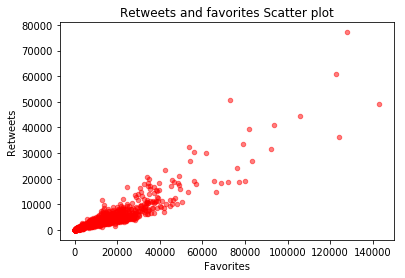

In [11]:
df_master.plot(kind = 'scatter', x = 'favorites', y = 'retweets', alpha = 0.5, color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

Text(0,0.5,'Rating')

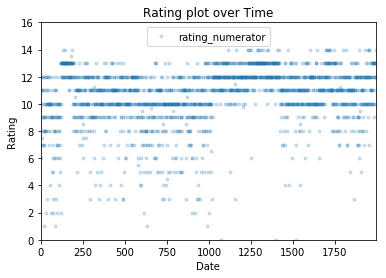

In [14]:
df_master.plot(y ='rating_numerator', ylim=[0,16], style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')

Text(0.5,1,'Dog Gender Partitions')

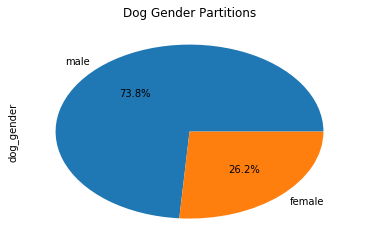

In [15]:
df_master[df_master['dog_gender'].notnull()]['dog_gender'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Dog Gender Partitions')